# Breast Cancer Data Analyzed
Data downloaded from kaggle in April 2020:       
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/version/2#data.csv

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
from  matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import auc, roc_curve, plot_roc_curve
from sklearn.tree import export_graphviz
import os
import graphviz
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [35]:
df = pd.read_csv('data/breastcancer_data.csv', index_col=0)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [36]:
df.shape

(569, 32)

## Transform target
Nominal data (*diagnosis*) needs to be converted into binaries for further analysis. For this, you could use either *map* or *replace*. Note: *M*=*malignant*, *B*=*benign*.

In [37]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [38]:
df['diagnosis']=df['diagnosis'].map({'M':1, 'B':0})
#df['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


## Check for Class Imbalance

In [39]:
print("diagnosis 0: ", df[df['diagnosis']==0].count()['diagnosis'])
print("diagnosis 1: ", df[df['diagnosis']==1].count()['diagnosis'])

diagnosis 0:  357
diagnosis 1:  212


## Check for NaN

In [40]:
df.isna().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [7]:
df['Unnamed: 32'].unique()

array([nan])

There is only NaN in feature *Unnamed: 32*. This can also be seen in the following heatmap.        
## Heatmap to view correlations

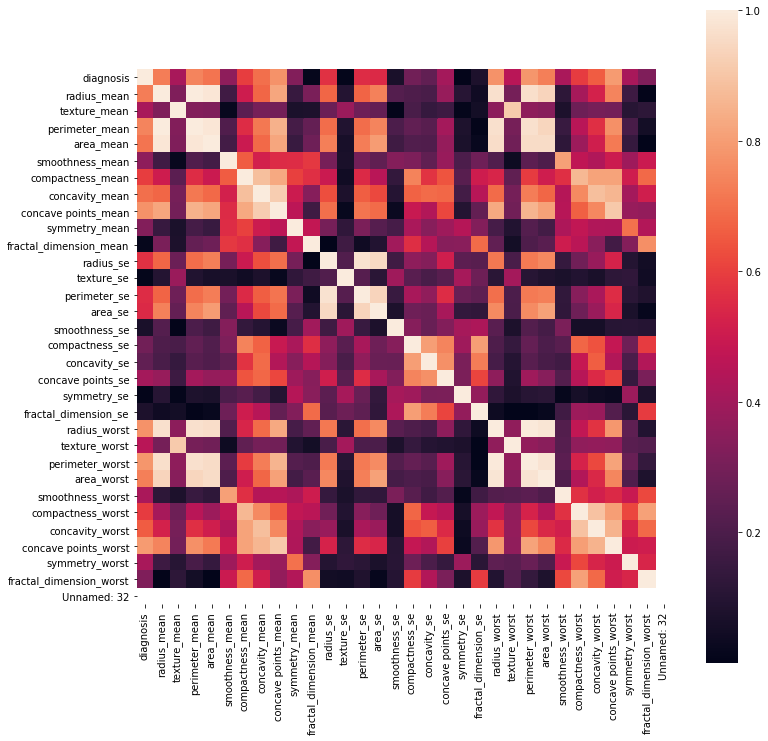

In [8]:
plt.figure(figsize=[12,12])
sns.heatmap(df.corr().abs(), annot=False, square=True)

Some features can be eliminated to avoid redundant data and multicolinearity:
- *perimeter_mean* and *area_mean* are already dislayed in *radius_mean*
- *perimeter_se* and *area_se* are already displaye in *radius_se*
- *perimeter_worst* and *area_worst* are already displaye in *radius_worst*
- *Unnamed: 32* as only containing NaN

In [9]:
df = df.drop(['perimeter_mean', 'area_mean',
              'perimeter_se', 'area_se',
              'perimeter_worst', 'area_worst',
              'Unnamed: 32'], axis=1)
df.head(3)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


### View on selected 'mean' parameters in dependence on *diagnosis* 

<Figure size 1080x1080 with 0 Axes>

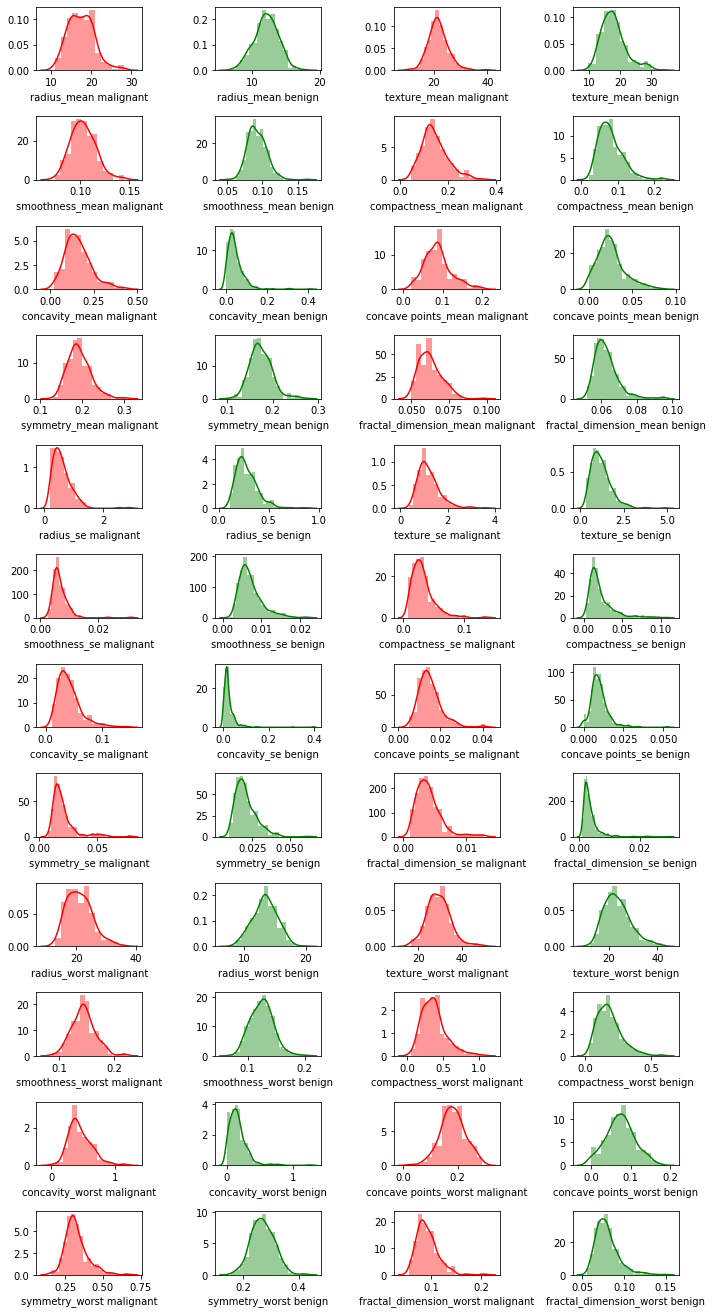

In [10]:
parameter_list = ['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

plt.figure(figsize=(15,15))
target_0 = df.loc[df['diagnosis']==0]   
target_1 = df.loc[df['diagnosis']==1]   
plt.figure(figsize=(10,24))
for i,elem in enumerate(parameter_list,1):    
    plt.subplot(16,4,i*2-1)
    sns.distplot(target_1[elem], color='r')            
    plt.xlabel(elem + ' malignant')
    plt.tight_layout()
    plt.subplot(16,4,i*2)
    sns.distplot(target_0[elem], color='g')            
    plt.xlabel(elem + ' benign')
    plt.tight_layout()   

### Comparative Box-Plots (malignant vs benign) for every parameter

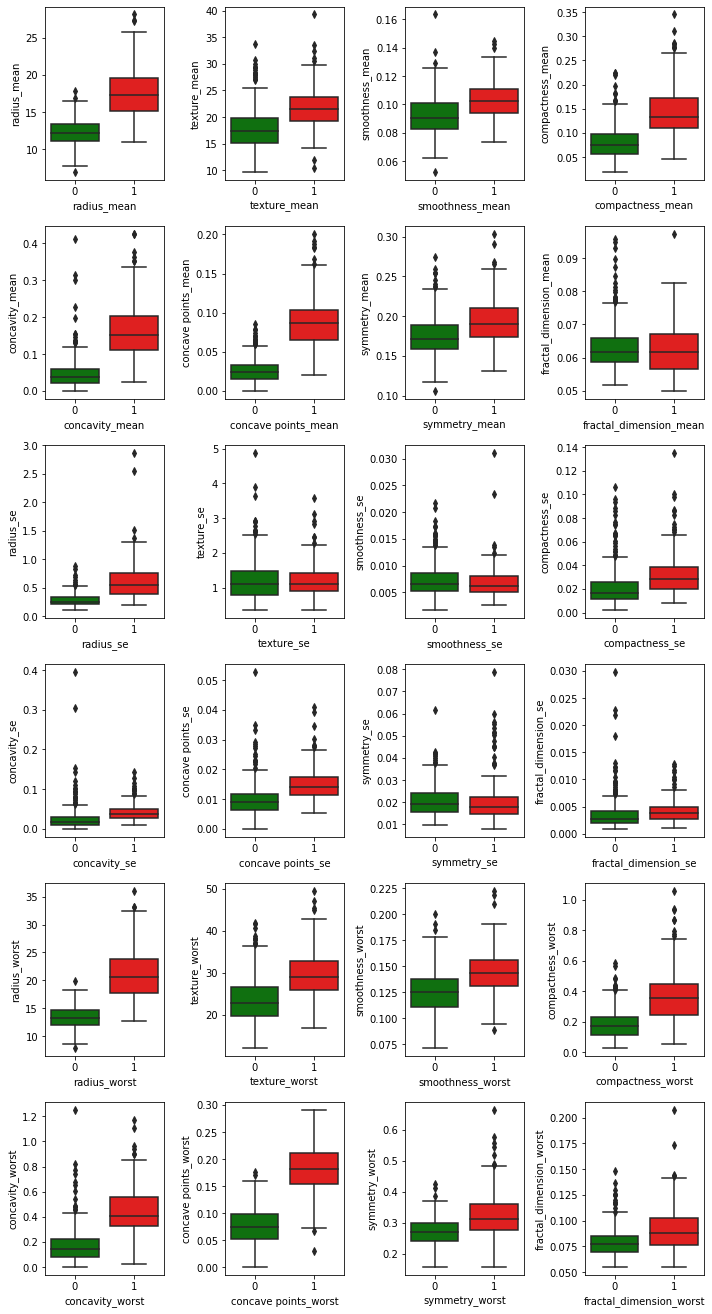

In [11]:
plt.figure(figsize=(10,24))
for i,elem in enumerate(parameter_list,1):
    plt.subplot(8,4,i)
    sns.boxplot(x = 'diagnosis', 
                y = elem, palette=['g', 'r'],
                data= df)
    plt.xlabel(elem)
    plt.tight_layout()

### 2D Scatter Plots

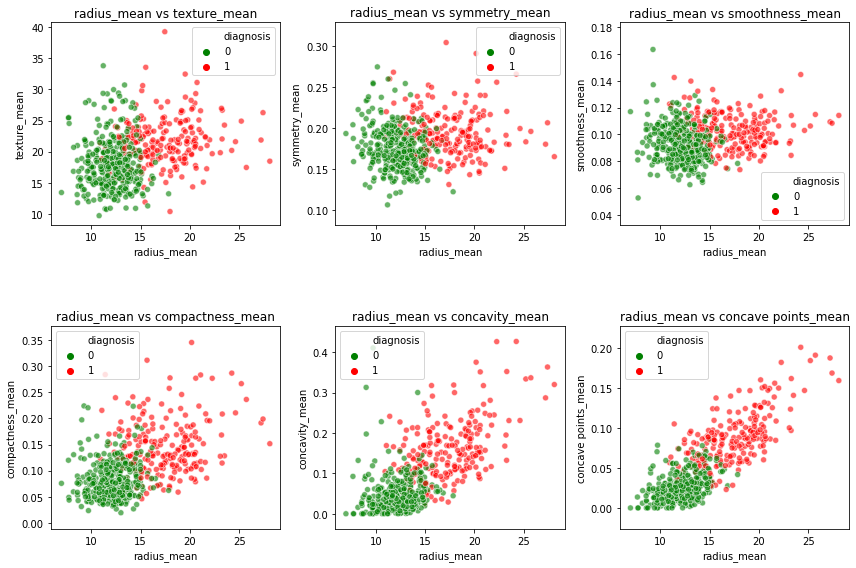

In [12]:
fig = plt.figure(figsize=(12,8))
color_dict = dict({0:'green', 1:'red'})

def plot_scatter(i,j,k, param_1, param_2):
    ax = plt.subplot(i,j,k, title = param_1 + ' vs ' + param_2)
    sns.scatterplot(df[param_1],df[param_2],
                    hue =df['diagnosis'], palette = color_dict, alpha = 0.6)
    plt.tight_layout()  

plot_scatter(2,3,1, 'radius_mean', 'texture_mean')
plot_scatter(2,3,2, 'radius_mean', 'symmetry_mean')
plot_scatter(2,3,3, 'radius_mean', 'smoothness_mean')
plot_scatter(2,3,4, 'radius_mean', 'compactness_mean')
plot_scatter(2,3,5, 'radius_mean', 'concavity_mean')
plot_scatter(2,3,6, 'radius_mean', 'concave points_mean')

plt.subplots_adjust(hspace=0.5)
plt.show()

## Descriptive Statistics

In [13]:
df.describe()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,...,0.020542,0.003795,16.269190,25.677223,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,...,0.008266,0.002646,4.833242,6.146258,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,...,0.007882,0.000895,7.930000,12.020000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,...,0.015160,0.002248,13.010000,21.080000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,...,0.018730,0.003187,14.970000,25.410000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,...,0.023480,0.004558,18.790000,29.720000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,...,0.078950,0.029840,36.040000,49.540000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Data Assignment for Machine Learning

In [14]:
Xy = df[['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]

Xy = Xy.dropna()
y = Xy['diagnosis']
X = Xy.drop(['diagnosis'], axis = 1)
X.shape, y.shape

((569, 24), (569,))

#### Scale

In [15]:
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

#### Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

# Machine Learning and Prediction

### Try Logistic Regression

In [17]:
lr = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 5],
              'solver': ['sag', 'saga']} 

grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5 )
grid_result = grid.fit(X_train, y_train)

print("best score: " +  str(grid.best_score_))
print("best C: " + str(grid.best_estimator_.C))
print("best solver: " + str(grid.best_estimator_.solver))

best score: 0.9812038303693571
best C: 5
best solver: sag


### Try Decision Tree Classifier

In [18]:
dt = DecisionTreeClassifier()
param_grid_dt = {'criterion' : ['gini', 'entropy'],
                'max_depth': [5,7,9],
                'max_leaf_nodes': [20,40,60]} 

grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=14 )
grid_result_dt = grid_dt.fit(X_train, y_train)

print("best score: " +  str(grid_dt.best_score_))
print("best max_depth: " + str(grid_dt.best_estimator_.max_depth))
print("best max_leaf_nodes: " + str(grid_dt.best_estimator_.max_leaf_nodes))

best score: 0.9344854070660523
best max_depth: 7
best max_leaf_nodes: 40


### Try Random Forest Classifier

In [19]:
rf = RandomForestClassifier()
param_grid_rf = {'n_estimators' : [20,35,50,65,80],
                'max_depth': [5,7,9],
                'bootstrap': [True, False]} 

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=6 )
grid_result_rf = grid_rf.fit(X_train, y_train)

print("best score: " +  str(grid_rf.best_score_))
print("best n_estimators: " + str(grid_rf.best_estimator_.n_estimators))
print("best max_depth: " + str(grid_rf.best_estimator_.max_depth))
print('Best bootstrap: ', grid_rf.best_estimator_.bootstrap)

best score: 0.9671361502347419
best n_estimators: 35
best max_depth: 7
Best bootstrap:  False


### Try SVC

In [20]:
scv = SVC()
param_grid_scv = {'C' : [0.01, 0.1, 1, 2, 5, 10, 25],
                'kernel': ['poly', 'rbf', 'sigmoid'],
                'degree': [3,4,5,6],
                'gamma': ['scale', 'auto']}

grid_scv = GridSearchCV(estimator=scv, param_grid=param_grid_scv, cv=6 )
grid_result_scv = grid_scv.fit(X_train, y_train)

print("best score: " +  str(grid_scv.best_score_))
print("best C: " + str(grid_scv.best_estimator_.C))
print("best kernel: " + str(grid_scv.best_estimator_.kernel))
print("best degree: " + str(grid_scv.best_estimator_.degree))
print('Best gamma: ', grid_scv.best_estimator_.gamma)

best score: 0.9812206572769954
best C: 2
best kernel: rbf
best degree: 3
Best gamma:  scale


# Cross Validation

In [21]:
def cross_val(model, m, X_train, y_train):
    cvValue_mean = []
    print(model)
    for i in range(6,15):       
        cross_val_L = cross_val_score(m, X_train, y_train, cv=i) 
        cvValue_mean.append([i,cross_val_L.mean()])
        #print(cvValue_mean)

    #Display cvValue_mean in dataFrame:
    df_cvValue_mean = pd.DataFrame(cvValue_mean)
    df_cvValue_mean.rename(columns={0: 'cv_set_value', 1:'cv_res_mean'}, inplace = True)
    df_cvValue_mean.set_index(['cv_set_value'], inplace=True)
    print(df_cvValue_mean['cv_res_mean'].sort_values(ascending=False), '\n\n')

# Predict

In [22]:
def fit_predict(model, dict_yPred, modelName):
    print(model)
    m = model
    m.fit(X_train, y_train)
    print('training score: ', m.score(X_train, y_train))
    y_pred = m.predict(X_test)
    dict_yPred[modelName] = y_pred
    print('accuracy score: ', accuracy_score(y_test,y_pred))
    print('precision score: ', precision_score(y_test, y_pred))
    print('recall score: ', recall_score(y_test, y_pred), '\n')    
    
    #call def cross_val
    cross_val(model, m, X_train, y_train)
    return m

#for later printing the DecisionTree as svg (at the end of the notebook) use the following here: 
#m_dt = fit_predict(DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20))

In [23]:
dict_y_pred = {}
clf_models = [LogisticRegression(C=10, solver='sag'),
          DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20),
          RandomForestClassifier(n_estimators=35, max_depth=7, bootstrap=True),
          SVC(C=2, kernel= 'rbf', degree=3, gamma='scale')]

model_names=['LogisticRegression','DecisionTreeClassifier', 'RandomForestClassifier', 'SVC']

In [24]:
dict_m = {}
for i, elem in enumerate(clf_models,1):
    dict_m[model_names[i-1]] = fit_predict(elem, dict_y_pred, model_names[i-1])

LogisticRegression(C=10, solver='sag')
training score:  0.9882629107981221
accuracy score:  0.965034965034965
precision score:  0.9298245614035088
recall score:  0.9814814814814815 

LogisticRegression(C=10, solver='sag')
cv_set_value
7     0.981226
8     0.981219
14    0.981183
6     0.976526
9     0.976507
10    0.976412
11    0.976383
12    0.974272
13    0.974140
Name: cv_res_mean, dtype: float64 


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20)
training score:  0.9953051643192489
accuracy score:  0.9440559440559441
precision score:  0.9107142857142857
recall score:  0.9444444444444444 

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20)
cv_set_value
14    0.943548
8     0.936583
7     0.929586
10    0.929568
9     0.924941
13    0.922640
12    0.922619
6     0.922535
11    0.922525
Name: cv_res_mean, dtype: float64 


RandomForestClassifier(max_depth=7, n_estimators=35)
training score:  0.9976525821596244
accuracy score:  0.958041958041958
precision score:  0.944444444

## Confusion Matrix

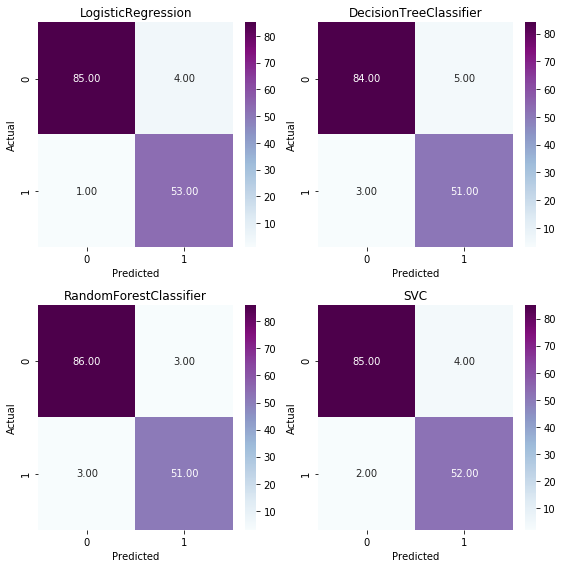

In [25]:
plt.figure(figsize=(8,8))
def plot_conf_matrix(i,j,k, model, title_name, y_test, y_pred):        
    ax = plt.subplot(i,j,k, title = title_name)
    sns.heatmap(confusion_matrix(y_test, y_pred),
                cmap = 'BuPu',
                annot=True,            
                fmt='0.2f') 
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()   
    #plt.subplots_adjust(hspace=0.5)

for i,elem in enumerate(clf_models,1):
    current_model = model_names[i-1]
    plot_conf_matrix(2,2,i, elem, current_model, y_test, dict_y_pred[current_model])

### Receiver Operating Curve

<Figure size 576x576 with 0 Axes>

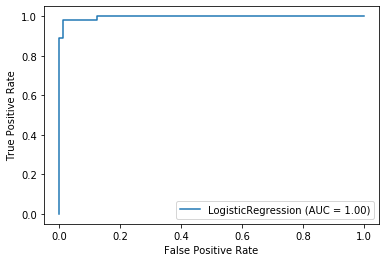

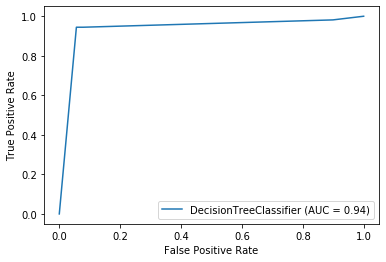

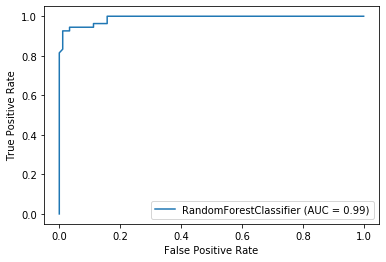

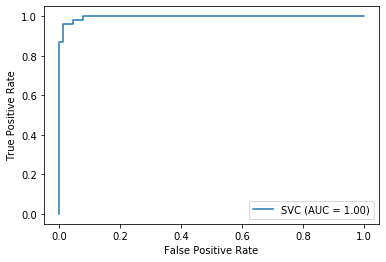

In [26]:
plt.figure(figsize=(8,8))
for i,elem in enumerate(clf_models,1):               
    plot_roc_curve(dict_m[model_names[i-1]], X_test, y_test)
    plt.show()

## Visualize result comparison

In [27]:
recall_results=[]
for reg in clf_models:    
    reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    recall_results.append(recall_score(y_test,y_pred))
            
dict_rec_score={'Classification Model':model_names,'recall score':recall_results}   
df_rec_score=pd.DataFrame(dict_rec_score)
df_rec_score

,Classification Model,recall score
0,LogisticRegression,0.981481
1,DecisionTreeClassifier,0.944444
2,RandomForestClassifier,0.944444
3,SVC,0.962963


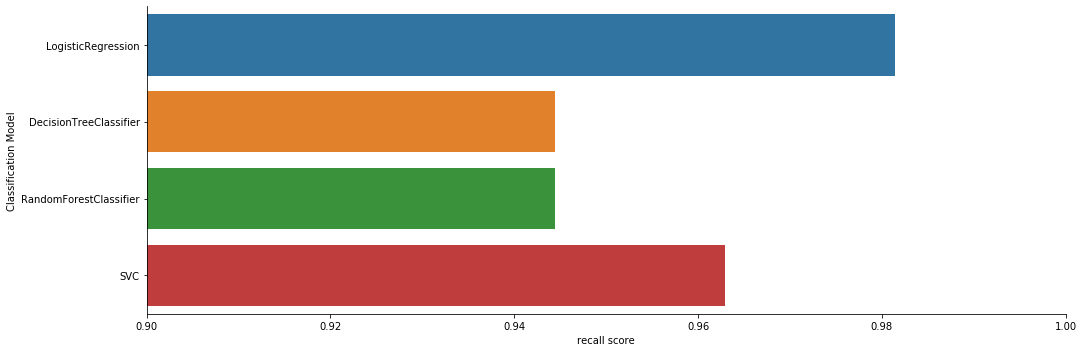

In [28]:
fig = sns.catplot(y='Classification Model',x='recall score',
            data=df_rec_score,kind='bar',height=5,aspect=3)
fig.set(xlim=(0.9, 1.0))

## Optional: Print Decision Tree for information